In [4]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Step 1: Process the data into dataframes
data = pd.read_csv("Salary_Data[1].csv")
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [6]:
data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [7]:
# Step 2: Filter Relevant Columns

data_filtered = data[['Years of Experience', 'Salary']].dropna()

x = data_filtered['Years of Experience'].values
y = data_filtered['Salary'].values


In [9]:
# Step 3: Function to Calculate Regression Parameters
def calculate_regression(X, Y):
    """
    Calculate the slope (m) and intercept (c) for linear regression.
    """
    #calculate mean of x & y using an inbuilt numpy method mean()
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    # total no.of input values
    m = len(X)

    # using the formula to calculate m & c
    num = 0
    den = 0

    for i in range(m):
        num += (X[i] - mean_x) * (Y[i] - mean_y)
        den += (X[i] - mean_x) ** 2

    m = num / den
    c = mean_y - (m * mean_x)

    return m, c

In [10]:
# Calculate parameters
m, c = calculate_regression(x, y)

print("Slope : ",m)
print("intercept : ",c)


# Step 4: Predict Function
def predict(x_value):
    """Predict y (Salary) based on x (Years of Experience)"""

    return m * x_value + c

# Step 5: Evaluate Model's accuracy using Mean Squared Error 
predicted_y = predict(x)
mse = np.mean((y - predicted_y) ** 2)
print(f"Mean Squared Error (MSE): {mse}")

Slope :  7046.768344026587
intercept :  58283.27509418632
Mean Squared Error (MSE): 962743941.6787317


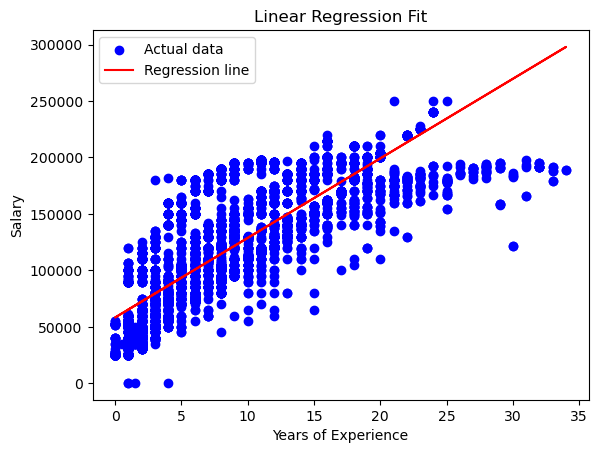

In [11]:
plt.scatter(x, y, color="blue", label="Actual data")
plt.plot(x, predict(x), color="red", label="Regression line")
plt.legend()
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Fit")
plt.show()


In [12]:
# Step 6: User Input for Prediction
while True:
    user_input = input("Enter years of experience to predict salary (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
   
    years_of_experience = float(user_input)
    predicted_salary = predict(years_of_experience)
    print(f"Predicted Salary for {years_of_experience} years of experience: {predicted_salary:.2f}")
    

Predicted Salary for 1.0 years of experience: 65330.04
Predicted Salary for 2.0 years of experience: 72376.81
Predicted Salary for 1.0 years of experience: 65330.04
